w=  0.0
	 1.0 2.0 0.0 4.0
	 2.0 4 0.0 16.0
	 3.0 0 0.0 0.0
MSE =  6.666666666666667
w=  0.1
	 1.0 2.0 0.1 3.61
	 2.0 4 0.2 14.44
	 3.0 0 0.30000000000000004 0.09000000000000002
MSE =  6.046666666666667
w=  0.2
	 1.0 2.0 0.2 3.24
	 2.0 4 0.4 12.96
	 3.0 0 0.6000000000000001 0.3600000000000001
MSE =  5.5200000000000005
w=  0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4 0.6000000000000001 11.559999999999999
	 3.0 0 0.9000000000000001 0.8100000000000003
MSE =  5.086666666666667
w=  0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4 0.8 10.240000000000002
	 3.0 0 1.2000000000000002 1.4400000000000004
MSE =  4.746666666666667
w=  0.5
	 1.0 2.0 0.5 2.25
	 2.0 4 1.0 9.0
	 3.0 0 1.5 2.25
MSE =  4.5
w=  0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4 1.2000000000000002 7.839999999999999
	 3.0 0 1.8000000000000003 3.240000000000001
MSE =  4.346666666666667
w=  0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4 1.4000000000

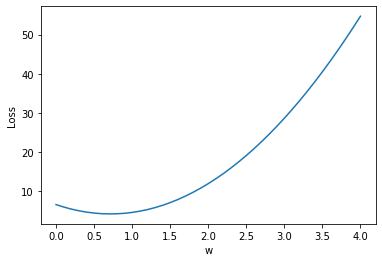

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4,0, 6.0]

def forward(x):
    return x*w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)*(y_pred - y)

w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    print("w= ", w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
        print("\t", x_val, y_val, y_pred_val, l)
    print("MSE = ",l_sum /3)
    w_list.append(w)
    mse_list.append(l_sum/3)
    
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

In [2]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0

def forwar(x):
    return x*w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)*(y_pred -y)

def gradient(x,y):
    return 2 * x * (x*w-y)

print("predict (before training)", 4, forward(4))

for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01*grad
        print("\tgrad: ", x_val, y_val, round(grad,2))
        l = loss(x_val, y_val)
        
    print("progress:", epoch, "w= ", round(w, 2), "loss= ", round(l, 2))

print("predict (after training)", "4 hours", forward(4))

predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.23
progress: 0 w=  1.26 loss=  4.92
	grad:  1.0 2.0 -1.48
	grad:  2.0 4.0 -5.8
	grad:  3.0 6.0 -12.0
progress: 1 w=  1.45 loss=  2.69
	grad:  1.0 2.0 -1.09
	grad:  2.0 4.0 -4.29
	grad:  3.0 6.0 -8.87
progress: 2 w=  1.6 loss=  1.47
	grad:  1.0 2.0 -0.81
	grad:  2.0 4.0 -3.17
	grad:  3.0 6.0 -6.56
progress: 3 w=  1.7 loss=  0.8
	grad:  1.0 2.0 -0.6
	grad:  2.0 4.0 -2.34
	grad:  3.0 6.0 -4.85
progress: 4 w=  1.78 loss=  0.44
	grad:  1.0 2.0 -0.44
	grad:  2.0 4.0 -1.73
	grad:  3.0 6.0 -3.58
progress: 5 w=  1.84 loss=  0.24
	grad:  1.0 2.0 -0.33
	grad:  2.0 4.0 -1.28
	grad:  3.0 6.0 -2.65
progress: 6 w=  1.88 loss=  0.13
	grad:  1.0 2.0 -0.24
	grad:  2.0 4.0 -0.95
	grad:  3.0 6.0 -1.96
progress: 7 w=  1.91 loss=  0.07
	grad:  1.0 2.0 -0.18
	grad:  2.0 4.0 -0.7
	grad:  3.0 6.0 -1.45
progress: 8 w=  1.93 loss=  0.04
	grad:  1.0 2.0 -0.13
	grad:  2.0 4.0 -0.52
	grad:  3.0 6.0 -1.07
progress: 9 w=  1

In [3]:
import torch
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = torch.tensor([1.0],requires_grad = True)

def forward(x):
    return x*w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

print("predict (before training)", 4, forward(4))
for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        l = loss(x_val, y_val)
        l.backward()
        print("grad: ", x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data
        w.grad.data.zero_()
        
    print("progress:", epoch, l.data[0])
print("predict (after training)", 4, forward(4))

predict (before training) 4 tensor([4.], grad_fn=<MulBackward0>)
grad:  1.0 2.0 tensor(-2.)
grad:  2.0 4.0 tensor(-7.8400)
grad:  3.0 6.0 tensor(-16.2288)
progress: 0 tensor(7.3159)
grad:  1.0 2.0 tensor(-1.4786)
grad:  2.0 4.0 tensor(-5.7962)
grad:  3.0 6.0 tensor(-11.9981)
progress: 1 tensor(3.9988)
grad:  1.0 2.0 tensor(-1.0932)
grad:  2.0 4.0 tensor(-4.2852)
grad:  3.0 6.0 tensor(-8.8704)
progress: 2 tensor(2.1857)
grad:  1.0 2.0 tensor(-0.8082)
grad:  2.0 4.0 tensor(-3.1681)
grad:  3.0 6.0 tensor(-6.5580)
progress: 3 tensor(1.1946)
grad:  1.0 2.0 tensor(-0.5975)
grad:  2.0 4.0 tensor(-2.3422)
grad:  3.0 6.0 tensor(-4.8484)
progress: 4 tensor(0.6530)
grad:  1.0 2.0 tensor(-0.4417)
grad:  2.0 4.0 tensor(-1.7316)
grad:  3.0 6.0 tensor(-3.5845)
progress: 5 tensor(0.3569)
grad:  1.0 2.0 tensor(-0.3266)
grad:  2.0 4.0 tensor(-1.2802)
grad:  3.0 6.0 tensor(-2.6500)
progress: 6 tensor(0.1951)
grad:  1.0 2.0 tensor(-0.2414)
grad:  2.0 4.0 tensor(-0.9465)
grad:  3.0 6.0 tensor(-1.9592)
prog

In [4]:
import torch
from torch.autograd import Variable

x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        self.linear = torch.nn.Linear(1,1)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
model = MyModel()

criterion = torch.nn.MSELoss(size_average = False)

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

for epoch in range(501):
    y_pred = model(x_data)
    
    loss = criterion(y_pred, y_data)
    
    if(epoch%100 == 0):
        print(epoch, loss.data.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
hour_var = torch.tensor([[4.0]])
print("predict (after training)", 4, model.forward(hour_var).data[0][0])

0 38.36743927001953
100 0.1311231553554535
200 0.030831895768642426
300 0.007249763701111078
400 0.001704697497189045
500 0.0004008332034572959
predict (after training) 4 tensor(7.9770)


C:\Anaconda3\envs\tensorflow\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [5]:
import torch
import torch.nn.functional as F

class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
        
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred
    
x_data = torch.Tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = torch.Tensor([[0.],[0.],[1.],[1.]])

model = MyModel()
criterion = torch.nn.BCELoss(size_average = True)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

for epoch in range(1000):
    
    y_pred = model(x_data)
    
    loss = criterion(y_pred, y_data)
    if(epoch%100 == 0):
        print(epoch, loss.data.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
hour_var = torch.Tensor([[1.0]])
print("1hour : ", model(hour_var).data[0][0]>0.5)
hour_var = torch.Tensor([[7.0]])
print("7hour : ", model(hour_var).data[0][0]>0.5)

C:\Anaconda3\envs\tensorflow\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Anaconda3\envs\tensorflow\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 1.238405466079712
100 0.5854028463363647
200 0.5517764687538147
300 0.5318406820297241
400 0.5135368704795837
500 0.4964500367641449
600 0.48047712445259094
700 0.4655310809612274
800 0.45153123140335083
900 0.4384031295776367
1hour :  tensor(False)
7hour :  tensor(True)


In [6]:
import torch
from torch.autograd import Variable
import numpy as np
xy = np.loadtxt('diabetes.csv.gz', delimiter=',', dtype = np.float32)
x_data = torch.from_numpy(xy[:, 0:-1])
y_data = torch.from_numpy(xy[:, [-1]])

class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.l1 = torch.nn.Linear(8,4)
        self.l2 = torch.nn.Linear(4,6)
        self.l3 = torch.nn.Linear(6,1)
        
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred
    
model = MyModel()

cirterion = torch.nn.BCELoss(size_average = True)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

for epoch in range(1000):
    y_pred = model(x_data)
    
    loss = criterion(y_pred, y_data)
    
    if(epoch%100 == 0):
        print("loss: ", loss)
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
cnt = 0
for it in range(y_data.size()[0]):
    if((y_pred[it][0]>0.5) == y_data[it][0].type(torch.ByteTensor)):
        cnt = cnt+1
        
print(cnt)
print("Accuracy : ", cnt*100/y_data.size()[0])

loss:  tensor(0.6488, grad_fn=<BinaryCrossEntropyBackward>)
loss:  tensor(0.6448, grad_fn=<BinaryCrossEntropyBackward>)
loss:  tensor(0.6447, grad_fn=<BinaryCrossEntropyBackward>)
loss:  tensor(0.6446, grad_fn=<BinaryCrossEntropyBackward>)
loss:  tensor(0.6445, grad_fn=<BinaryCrossEntropyBackward>)
loss:  tensor(0.6444, grad_fn=<BinaryCrossEntropyBackward>)
loss:  tensor(0.6442, grad_fn=<BinaryCrossEntropyBackward>)
loss:  tensor(0.6441, grad_fn=<BinaryCrossEntropyBackward>)
loss:  tensor(0.6439, grad_fn=<BinaryCrossEntropyBackward>)
loss:  tensor(0.6437, grad_fn=<BinaryCrossEntropyBackward>)
496
Accuracy :  65.34914361001317


In [7]:
import torch
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

class DiabetesDataset(Dataset):
    
    def __init__(self):
        xy = np.loadtxt('diabetes.csv.gz', delimiter = ',', dtype = np.float32)
        
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, 0:-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len
    
dataset = DiabetesDataset()
train_loader = DataLoader(dataset = dataset,
                         batch_size = 32,
                         shuffle = True,
                         num_workers = 0)

for epoch in range(2):
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        y_pred = model(inputs)
        
        loss = criterion(y_pred, labels)
        print(epoch, i, loss.data.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

0 0 0.6810482144355774
0 1 0.6035415530204773
0 2 0.6224713325500488
0 3 0.6810896396636963
0 4 0.622543454170227
0 5 0.6423510909080505
0 6 0.6408374905586243
0 7 0.6223763227462769
0 8 0.6008575558662415
0 9 0.6620415449142456
0 10 0.7037256360054016
0 11 0.6613956093788147
0 12 0.5837894082069397
0 13 0.6016180515289307
0 14 0.7054965496063232
0 15 0.7013387680053711
0 16 0.5640274882316589
0 17 0.6818282008171082
0 18 0.7017515301704407
0 19 0.6230666637420654
0 20 0.5844854712486267
0 21 0.7026364803314209
0 22 0.6406668424606323
0 23 0.6166762709617615
1 0 0.5220386981964111
1 1 0.6839430332183838
1 2 0.6208837628364563
1 3 0.5981848835945129
1 4 0.555823028087616
1 5 0.5975558757781982
1 6 0.527087926864624
1 7 0.5955474376678467
1 8 0.7174712419509888
1 9 0.7362598180770874
1 10 0.75254225730896
1 11 0.6208395957946777
1 12 0.7253329157829285
1 13 0.5813343524932861
1 14 0.6819541454315186
1 15 0.6216100454330444
1 16 0.6224380135536194
1 17 0.6420544385910034
1 18 0.6208305954

In [8]:
import numpy as np
import torch

loss = torch.nn.CrossEntropyLoss()

y = torch.LongTensor([2, 0, 1])
y.requires_grad = False

y_pred1 = torch.Tensor([[2.0, 1.0, 0.1],
                      [1.0, 1.4, 0.1],
                      [1.1, 0.2, 3.1]])
y_pred2 = torch.Tensor([[0.5, 1.0, 2.5],
                      [2.2, 1.1, 0.3],
                      [1.5, 2.0, 1.3]])

l1 = loss(y_pred1, y)
l2 = loss(y_pred2, y)

print(l1, l2)

tensor(2.1518) tensor(0.4812)


In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batch_size = 64

train_dataset = datasets.MNIST(root='./mnist_data/',
                              train = True,
                              transform = transforms.ToTensor(),
                              download = True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                             train = False,
                             transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                         batch_size = batch_size,
                                         shuffle = False)

class NNModel(torch.nn.Module):
    
    def __init__(self):
        super(NNModel, self).__init__()
        self.l1 = nn.Linear(784,520)
        self.l2 = nn.Linear(520,320)
        self.l3 = nn.Linear(320,240)
        self.l4 = nn.Linear(240,120)
        self.l5 = nn.Linear(120,10)
        
    def forward(self, x):
        x = x.view(-1,784) #Flatten:(n, 784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)
    
model = NNModel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

model = model.to(device)

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        
        optimizer.zero_grad()
        
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx%50 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.
                  format(epoch, batch_idx* len(data), len(train_loader.dataset), 
                         100. * batch_idx / len(train_loader), loss.data.item()))
            
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        
        test_loss += criterion(output, target).data.item()
        
        pred = output.data.max(1, keepdim = True)[1]
        correct += pred.eq(target.data.view_as(pred)).sum()
        
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.
         format(test_loss, correct, len(test_loader.dataset),
               100.*correct / len(test_loader.dataset)))
    
    
for epoch in range(1, 9):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303826
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.298490
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.299068
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.301366
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.289932
Train Epoch: 1 [16000/60000 (27%)]	Loss: 2.292257
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.285275
Train Epoch: 1 [22400/60000 (37%)]	Loss: 2.287439
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.285402
Train Epoch: 1 [28800/60000 (48%)]	Loss: 2.281440
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.277319
Train Epoch: 1 [35200/60000 (59%)]	Loss: 2.265400
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.241256
Train Epoch: 1 [41600/60000 (69%)]	Loss: 2.231885
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.201541
Train Epoch: 1 [48000/60000 (80%)]	Loss: 2.143687
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.059861
Train Epoch: 1 [54400/60000 (91%)]	Loss: 1.874338
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.700342

Test set: Average loss: 0.0224, Accuracy: 5770/10000 (58%)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64

train_dataset = datasets.MNIST(root = './mnist_data/', train = True, transform = transforms.ToTensor(), download = True)
test_dataset = datasets.MNIST(root = './mnist_data', train = False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

class InceptionModule(nn.Module):
    
    def __init__(self, in_channels):
        super(InceptionModule, self).__init__()
        self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size = 1)
        
        self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size = 1)
        self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size = 5, padding = 2)
        
        self.branch3x3_1 = nn.Conv2d(in_channels, 16, kernel_size = 1)
        self.branch3x3_2 = nn.Conv2d(16, 24, kernel_size = 3, padding = 1)
        self.branch3x3_3 = nn.Conv2d(24, 24, kernel_size = 3, padding = 1)
        
        self.branch_pool = nn.Conv2d(in_channels, 24, kernel_size = 1)
        
    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        
        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)
        
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = self.branch3x3_2(branch3x3)
        branch3x3 = self.branch3x3_3(branch3x3)
        
        branch_pool = F.avg_pool2d(x, kernel_size = 3, stride =1, padding =1)
        branch_pool = self.branch_pool(branch_pool)
        
        outputs = [branch1x1, branch5x5, branch3x3, branch_pool]
        
        #torch.cat
        #x = tensor([[0.6580, -1.0969, -0.4614],
        #[-0.1034, -0.5790, 0.1497]])
        #torch.cat((x,x,x),0) -> (6, 3) 행렬
        #torch.cat((x,x,x),1) -> (2, 9) 행렬로 합쳐짐
        #(n*n, 16), (n*n, 24), (n*n, 24), (n*n, 24) -> (n*n, 88)
        
        return torch.cat(outputs, 1)
    
class MainNet(nn.Module):
    
    def __init__(self):
        super(MainNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1,10,kernel_size = 5)
        self.conv2 = nn.Conv2d(88,20,kernel_size = 5)
        
        self.incept1 = InceptionModule(in_channels = 10)
        self.incept2 = InceptionModule(in_channels = 20)
        
        self.max_pool = nn.MaxPool2d(2)
        self.fc = nn.Linear(1408, 10)
        
    def forward(self, x):
        in_size = x.size(0) #size(0) -> (n, 28 * 28) return n
        x = F.relu(self.max_pool(self.conv1(x)))
        x = self.incept1(x)
        x = F.relu(self.max_pool(self.conv2(x)))
        x = self.incept2(x)
        x = x.view(in_size, -1)
        x = self.fc(x)
        return F.log_softmax(x)
    
model = MainNet().to(device)

optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.NLLLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        
        optimizer.zero_grad()
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 50 == 0:
            print('Train Epcoh : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format
                 (epoch, batch_idx * len(data), len(train_loader.dataset),
                 100. * batch_idx / len(train_loader), loss.data.item()))
            
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        test_loss += criterion(output, target).item()
        
        pred = output.data.max(1,keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        
    test_loss /= len(test_loader.dataset)/batch_size
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format
         (test_loss, correct, len(test_loader.dataset),
         100.*correct, len(test_loader.dataset)))
    
for epoch in range(1, 10):
    train(epoch)
    test()

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epcoh : 1 [0/60000 (0%)]	Loss: 2.297312
Train Epcoh : 1 [3200/60000 (5%)]	Loss: 2.295216
Train Epcoh : 1 [6400/60000 (11%)]	Loss: 2.280759
Train Epcoh : 1 [9600/60000 (16%)]	Loss: 2.235453
Train Epcoh : 1 [12800/60000 (21%)]	Loss: 1.835290
Train Epcoh : 1 [16000/60000 (27%)]	Loss: 0.908140
Train Epcoh : 1 [19200/60000 (32%)]	Loss: 0.453202
Train Epcoh : 1 [22400/60000 (37%)]	Loss: 0.589773
Train Epcoh : 1 [25600/60000 (43%)]	Loss: 0.165725
Train Epcoh : 1 [28800/60000 (48%)]	Loss: 0.286789
Train Epcoh : 1 [32000/60000 (53%)]	Loss: 0.127275
Train Epcoh : 1 [35200/60000 (59%)]	Loss: 0.189281
Train Epcoh : 1 [38400/60000 (64%)]	Loss: 0.373725
Train Epcoh : 1 [41600/60000 (69%)]	Loss: 0.311172
Train Epcoh : 1 [44800/60000 (75%)]	Loss: 0.243919
Train Epcoh : 1 [48000/60000 (80%)]	Loss: 0.186592
Train Epcoh : 1 [51200/60000 (85%)]	Loss: 0.310170
Train Epcoh : 1 [54400/60000 (91%)]	Loss: 0.268090
Train Epcoh : 1 [57600/60000 (96%)]	Loss: 0.181770

Test set: Average loss: 0.1619, Accurac

Train Epcoh : 9 [3200/60000 (5%)]	Loss: 0.130043
Train Epcoh : 9 [6400/60000 (11%)]	Loss: 0.085800
Train Epcoh : 9 [9600/60000 (16%)]	Loss: 0.036722
Train Epcoh : 9 [12800/60000 (21%)]	Loss: 0.022263
Train Epcoh : 9 [16000/60000 (27%)]	Loss: 0.029629
Train Epcoh : 9 [19200/60000 (32%)]	Loss: 0.016486
Train Epcoh : 9 [22400/60000 (37%)]	Loss: 0.030139
Train Epcoh : 9 [25600/60000 (43%)]	Loss: 0.051207
Train Epcoh : 9 [28800/60000 (48%)]	Loss: 0.065443
Train Epcoh : 9 [32000/60000 (53%)]	Loss: 0.019198
Train Epcoh : 9 [35200/60000 (59%)]	Loss: 0.051885
Train Epcoh : 9 [38400/60000 (64%)]	Loss: 0.051268
Train Epcoh : 9 [41600/60000 (69%)]	Loss: 0.040315
Train Epcoh : 9 [44800/60000 (75%)]	Loss: 0.011383
Train Epcoh : 9 [48000/60000 (80%)]	Loss: 0.099227
Train Epcoh : 9 [51200/60000 (85%)]	Loss: 0.018509
Train Epcoh : 9 [54400/60000 (91%)]	Loss: 0.076363
Train Epcoh : 9 [57600/60000 (96%)]	Loss: 0.043268

Test set: Average loss: 0.0516, Accuracy: 9837/10000 (983700%)



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import sys

idx2char = ['h', 'i', 'e', 'l', 'o']

x_data = [0,1,0,2,3,3] #hihell
             
one_hot_lookup = [[1, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 1]]
             
x_one_hot = [one_hot_lookup[x] for x in x_data]
             
y_data = [1,0,2,3,3,4]#ihello
             
inputs = Variable(torch.Tensor(x_one_hot))
labels = Variable(torch.LongTensor(y_data))

num_classes = 5
input_size = 5 # one-hote size
hidden_size = 5 #output from the cell 
batch_size = 1 # sentence의 수(단어개수)
sequence_length = 1 #한번에 하나씩
num_layers = 1

class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.rnn = nn.RNN(input_size = input_size, hidden_size = hidden_size, batch_first = True)
    
    def forward(self, hidden, x):
        #input x를 (batcch_size, sequence_length, input_size)로 reshape 함
        #just for make sure
        x = x.view(batch_size, sequence_length, input_size)
             
        #Propagate input through RNN
        #Input:(batch, seq_len, input_size)
        out, hidden = self.rnn(x, hidden)
             
        #for make sure, output이 N * 5 shape을 따르게 하기 위하여
        return hidden, out.view(-1, num_classes)
             
    def init_hidden(self):
        #initialize hidden and cell states
        #(num_layers * num_directions, batch, hidden_size)
        return Variable(torch.zeros(num_layers, batch_size, hidden_size))
             
model = Model()
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.1)             
             
for epoch in range(100):
    optimizer.zero_grad()
    loss = 0
    hidden = model.init_hidden()
    sys.stdout.write("predicted string : ")
    
    for input, label in zip(inputs, labels):
        hidden, output = model(hidden, input)
        val, idx = output.max(1)
        sys.stdout.write(idx2char[idx.data.item()])
        loss += criterion(output, label) # error : dimension specified as 0 but tensor has no dimensions
    
    print(", eopch: #d, loss: %1.3f" % (epoch+1, loss.data.item()))
    
    loss.backward()
    optimizer.step()

In [18]:
import torch
import torch.nn as nn
from torch.autograd import Variable

torch.manual_seed(777)  # reproducibility


idx2char = ['h', 'i', 'e', 'l', 'o']

# Teach hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3

y_data = [1, 0, 2, 3, 3, 4]    # ihello

# As we have one batch of samples, we will change them to variables only once
inputs = Variable(torch.Tensor(x_one_hot))
labels = Variable(torch.LongTensor(y_data))

num_classes = 5
input_size = 5  # one-hot size
hidden_size = 5  # output from the LSTM. 5 to directly predict one-hot
batch_size = 1   # one sentence
sequence_length = 6  # |ihello| == 6
num_layers = 1  # one-layer rnn


class RNN(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(RNN, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.sequence_length = sequence_length

        self.rnn = nn.RNN(input_size=5, hidden_size=5, batch_first=True)

    def forward(self, x):
        # Initialize hidden and cell states
        # (num_layers * num_directions, batch, hidden_size) for batch_first=True
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        # Reshape input
        x.view(x.size(0), self.sequence_length, self.input_size)

        # Propagate input through RNN
        # Input: (batch, seq_len, input_size)
        # h_0: (num_layers * num_directions, batch, hidden_size)

        out, _ = self.rnn(x, h_0)
        return out.view(-1, num_classes)


# Instantiate RNN model
rnn = RNN(num_classes, input_size, hidden_size, num_layers)
print(rnn)

# Set loss and optimizer function
# CrossEntropyLoss = LogSoftmax + NLLLoss
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.1)

# Train the model
for epoch in range(100):
    outputs = rnn(inputs)
    optimizer.zero_grad()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    _, idx = outputs.max(1)
    idx = idx.data.numpy()
    result_str = [idx2char[c] for c in idx.squeeze()]
    print("epoch: %d, loss: %1.3f" % (epoch + 1, loss.data.item()))
    print("Predicted string: ", ''.join(result_str))

print("Learning finished!")

RNN(
  (rnn): RNN(5, 5, batch_first=True)
)
epoch: 1, loss: 1.693
Predicted string:  llllll
epoch: 2, loss: 1.523
Predicted string:  llllll
epoch: 3, loss: 1.393
Predicted string:  llllll
epoch: 4, loss: 1.263
Predicted string:  llllll
epoch: 5, loss: 1.146
Predicted string:  llllll
epoch: 6, loss: 1.055
Predicted string:  lhelll
epoch: 7, loss: 1.002
Predicted string:  ihelll
epoch: 8, loss: 0.965
Predicted string:  ihelll
epoch: 9, loss: 0.913
Predicted string:  ihelll
epoch: 10, loss: 0.879
Predicted string:  ihelll
epoch: 11, loss: 0.840
Predicted string:  ihelll
epoch: 12, loss: 0.805
Predicted string:  ihello
epoch: 13, loss: 0.779
Predicted string:  ihello
epoch: 14, loss: 0.758
Predicted string:  ihello
epoch: 15, loss: 0.738
Predicted string:  ihello
epoch: 16, loss: 0.717
Predicted string:  ihello
epoch: 17, loss: 0.694
Predicted string:  ihello
epoch: 18, loss: 0.667
Predicted string:  ihelll
epoch: 19, loss: 0.643
Predicted string:  ihelll
epoch: 20, loss: 0.647
Predicted s